In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: Algebraic and geometric interpretations
---


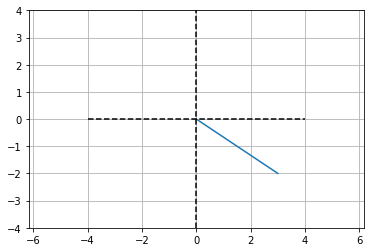

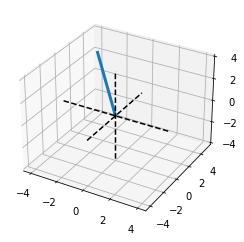

In [2]:

# 2-dimensional vector
v2 = [ 3, -2 ]

# 3-dimensional vector
v3 = [ -4, 5, 2 ]

# row to column (or vice-versa):
v3t = np.transpose(v3)

# plot them
plt.plot([0,v2[0]],[0,v2[1]])
plt.axis('equal')
plt.plot([-4, 4],[0, 0],'k--')
plt.plot([0, 0],[-4, 4],'k--')
plt.grid()
plt.axis((-4, 4, -4, 4))
plt.show()

# plot the 3D vector
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.gca(projection='3d')
ax.plot([0, v3[0]],[0, v3[1]],[0, v3[2]],linewidth=3)

# make the plot look nicer
ax.plot([0, 0],[0, 0],[-4, 4],'k--')
ax.plot([0, 0],[-4, 4],[0, 0],'k--')
ax.plot([-4, 4],[0, 0],[0, 0],'k--')
plt.show()


---
# VIDEO: Vector addition/subtraction
---


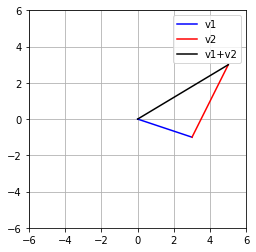

In [3]:

# two vectors in R2
v1 = np.array([ 3, -1 ])
v2 = np.array([ 2,  4 ])

v3 = v1 + v2


# plot them
plt.plot([0, v1[0]],[0, v1[1]],'b',label='v1')
plt.plot([0, v2[0]]+v1[0],[0, v2[1]]+v1[1],'r',label='v2')
plt.plot([0, v3[0]],[0, v3[1]],'k',label='v1+v2')

plt.legend()
plt.axis('square')
plt.axis((-6, 6, -6, 6 ))
plt.grid()
plt.show()



---
# VIDEO: Vector-scalar multiplication
---


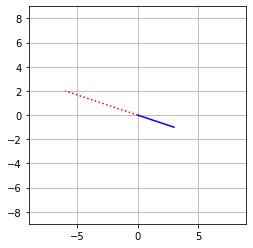

In [4]:
# vector and scalar
v1 = np.array([ 3, -1 ])
l  = -2
v1m = v1*l # scalar-modulated

# plot them
plt.plot([0, v1[0]],[0, v1[1]],'b',label='v_1')
plt.plot([0, v1m[0]],[0, v1m[1]],'r:',label='\lambda v_1')

plt.axis('square')
axlim = max([max(abs(v1)),max(abs(v1m))])*1.5 # dynamic axis lim
plt.axis((-axlim,axlim,-axlim,axlim))
plt.grid()
plt.show()


---
# VIDEO: Vector-vector multiplication: the dot product
---


In [5]:
## many ways to compute the dot product

v1 = np.array([ 1, 2, 3, 4, 5, 6 ])
v2 = np.array([ 0, -4, 5,  -3, 6, 5 ])

# method 1
dp1 = sum( np.multiply(v1,v2) )

# method 2
dp2 = np.dot( v1,v2 )

# method 3
dp3 = np.matmul( v1,v2 )

# method 4
dp4 = 0  # initialize

# loop over elements
for i in range(len(v1)):
    
    # multiply corresponding element and sum
    dp4 = dp4 + v1[i]*v2[i]


print(dp1,dp2,dp3,dp4)

55 55 55 55


# VIDEO: Dot product properties: associative and distributive

In [6]:
## Distributive property

# create random vectors
n = 10
a = np.random.randn(n)
b = np.random.randn(n)
c = np.random.randn(n)

# the two results
res1 = np.dot( a , (b+c) )
res2 = np.dot(a,b) + np.dot(a,c)

# compare them
print([ res1,res2 ])

[-2.1268213132830955, -2.126821313283097]


In [7]:
## Associative property

# create random vectors
n = 5
a = np.random.randn(n)
b = np.random.randn(n)
c = np.random.randn(n)

# the two results
res1 = np.dot( a , np.dot(b,c) )
res2 = np.dot( np.dot(a,b) , c )

# compare them
print(res1)
print(res2)


### special cases where associative property works!
# 1) one vector is the zeros vector
# 2) a==b==c


[0.05552319 0.14207301 0.18150642 0.40963942 0.05355401]
[ 0.31276394 -2.34168411  0.43463964 -0.55591911 -0.11973702]


In [8]:
# Code Challenge

A = np.random.randn(4,6)
B = np.random.randn(4,6)

print(A)
print(' ')
print(B)

dps = np.zeros(6)

for i in range(6):
    dps[i] = np.dot( A[:,i], B[:,i] )

print(' ')
print(dps)


[[-0.59481889 -0.22275207  0.15822753 -0.24952151  1.02553571 -0.62205029]
 [ 2.04678996 -0.43031339 -0.71748036  0.14033285 -1.42743317  0.31553825]
 [ 0.46321916 -1.65489427  1.03884954 -0.38376346  0.05008451 -0.37910546]
 [ 0.3769843  -1.45824179  0.31230232  0.89364798 -1.67895086  2.31633486]]
 
[[-0.90081816  0.82626057 -0.70924001  0.63603478 -1.38846938 -1.09014696]
 [ 1.2031653  -0.05215549  0.18158895 -1.08522498 -0.38075315  0.44679402]
 [-0.60331703  0.04959962 -0.97859828  0.24545549 -0.20099691  0.09104432]
 [-0.17461484 -0.15982092 -0.48366877 -0.73957935 -1.12583314  1.63081724]]
 
[ 2.65315524 -0.01063264 -1.41017505 -1.06611751  0.99972642  4.56211025]


In [9]:
# Code Challenge 

n = 100

a = np.random.randn(n)
b = np.random.randn(n)

ab = np.dot(a,b)
ba = np.dot(b,a)

print(ab==ba)

True



---
# VIDEO: Vector length
---


In [10]:
# a vector
v1 = np.array([ 1, 2, 3, 4, 5, 6 ])

# methods 1-4, just like with the regular dot product, e.g.:
vl1 = np.sqrt( sum( np.multiply(v1,v1)) )

# method 5: take the norm
vl2 = np.linalg.norm(v1)

print(vl1,vl2)

9.539392014169456 9.539392014169456



---
# VIDEO: The dot product from a geometric perspective
---


In [11]:
import math

1.5707963267948966
90.0


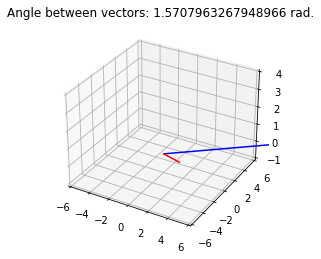

In [12]:

# two vectors
v1 = np.array([ 16,  -2, 4 ])
v2 = np.array([ 0.5, 2, -1 ])

# compute the angle (radians) between two vectors
ang = np.arccos( np.dot(v1,v2) / (np.linalg.norm(v1)*np.linalg.norm(v2)) )

print(ang)
print(math.degrees(ang))

# draw them
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot([0, v1[0]],[0, v1[1]],[0, v1[2]],'b')
ax.plot([0, v2[0]],[0, v2[1]],[0, v2[2]],'r')

plt.axis((-6, 6, -6, 6))
plt.title('Angle between vectors: %s rad.' %ang)
plt.show()


In [13]:
## equivalence of algebraic and geometric dot product formulas



# algebraic
dp_a = np.dot( v1,v2 )

# geometric
dp_g = np.linalg.norm(v1)*np.linalg.norm(v2)*np.cos(ang)


# print dot product to command
print(dp_a)
print(dp_g)


0.0
2.330853880596675e-15


In [14]:
a = [1, -2]
b = [2, 3]
c = [0, 2]

dp_ab = np.dot(a,b)
dp_ac = np.dot(a,c)
dp_bc = np.dot(b,c)

print(dp_ab, dp_ac, dp_bc)

-4 -4 6


In [15]:
# code challenge 

v1 = np.array([-3, 4, 6])
v2 = np.array([3, 6, -3])

l = -2
a = 3

dp1 = np.dot(v1,v2)

sv1 = np.dot(a,v2)
sv2 = np.dot(l,v1)

# sv3 = np.dot(a,v1)
# sv4 = np.dot(a,v2)

dp2 = np.dot(sv1,sv2)
# dp3 = np.dot(sv3,sv4)
# dp4 = np.dot(sv1,sv4)

print(dp1, dp2)

-3 18



---
# VIDEO: Vector Hadamard multiplication
---


In [16]:

# create vectors
w1 = [ 1, 3, 5 ]
w2 = [ 3, 4, 2 ]
w3 = np.multiply(w1,w2)
print(w3)


[ 3 12 10]



---
# VIDEO: Vector outer product
---


In [17]:

v1 = np.array([  1, 2, 3 ])
v2 = np.array([ -1, 0, 3])

# outer product
print(np.outer(v1,v2))

# terrible programming, but helps conceptually:
op = np.zeros((len(v1),len(v1)))
for i in range(0,len(v1)):
    for j in range(0,len(v2)):
        op[i,j] = v1[i] * v2[j]

print(op)

[[-1  0  3]
 [-2  0  6]
 [-3  0  9]]
[[-1.  0.  3.]
 [-2.  0.  6.]
 [-3.  0.  9.]]



---
# VIDEO: Vector cross product
---


[15 20  1] [[15], [20], [1]]


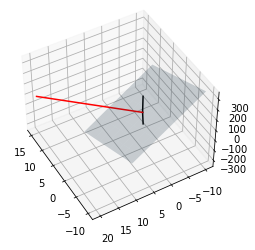

In [2]:
# create vectors
v1  = [ -3,  2, 5 ]
v2  = [  4, -3, 0 ]

# Python's cross-product function
v3a = np.cross( v1,v2 )

# "manual" method
v3b = [ [v1[1]*v2[2] - v1[2]*v2[1]],
        [v1[2]*v2[0] - v1[0]*v2[2]],
        [v1[0]*v2[1] - v1[1]*v2[0]] ]

print(v3a,v3b)


fig = plt.figure()
ax = fig.gca(projection='3d')

# draw plane defined by span of v1 and v2
xx, yy = np.meshgrid(np.linspace(-10,10,10),np.linspace(-10,10,10))
z1 = (-v3a[0]*xx - v3a[1]*yy)/v3a[2]
ax.plot_surface(xx,yy,z1,alpha=.2)

## plot the two vectors
ax.plot([0, v1[0]],[0, v1[1]],[0, v1[2]],'k')
ax.plot([0, v2[0]],[0, v2[1]],[0, v2[2]],'k')
ax.plot([0, v3a[0]],[0, v3a[1]],[0, v3a[2]],'r')


ax.view_init(azim=150,elev=45)
plt.show()

In [195]:
a,b,c = symbols('a,b,c')

a,b,c = 1,-2,-3

u = np.array([5,0,0])
x = np.array([a,b,c])

print(np.dot(u,x))
print(' ')
print(np.array([np.cross(u,x)]).T)



5
 
[[  0]
 [ 15]
 [-10]]


In [240]:
# c = np.array([5,0,0])
# a = np.array([-5,-5/2,0])
# b = np.array([-5,-0,-5/3])
# n = np.array([1,-2,-3])

c = np.array([5,-3,2])
a = np.array([1,2,-1])
b = np.array([7,2,1])
n = np.array([1,-2,-3])

pa = c-a
pb = c-b 

x,y,z = a[0],a[1],a[2]
print(x - 2*y - 3*z)

x,y,z = b[0],b[1],b[2]
print(x - 2*y - 3*z)


print(np.dot(n,b))
print(np.dot(n,a))
print('---')
x,y,z = c[0],c[1],c[2]
print(x - 2*y - 3*z)
print(np.dot(c,n))
print(np.dot(pa,n))
print(np.dot(pb,n))


0
0
0
0
---
5
5
5
5



---
# VIDEO: Hermitian transpose (a.k.a. conjugate transpose)
---


In [2]:
# create a complex number
z = np.complex(3,4)

print(z)
# magnitude
print( np.linalg.norm(z) )

# by transpose?
print( np.transpose(z)*z )

# by Hermitian transpose
print( np.transpose(z.conjugate())*z )


# complex vector
v = np.array( [ 3, 4j, 5+2j, np.complex(2,-5) ] )
print( v.T )
print( np.transpose(v) )
print( np.transpose(v.conjugate()) )

(3+4j)
5.0
(-7+24j)
(25+0j)
[3.+0.j 0.+4.j 5.+2.j 2.-5.j]
[3.+0.j 0.+4.j 5.+2.j 2.-5.j]
[3.-0.j 0.-4.j 5.-2.j 2.+5.j]



---
# VIDEO: Unit vector
---


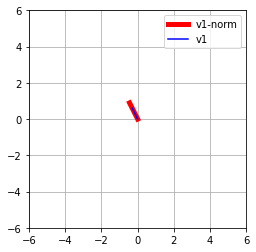

In [4]:

# vector
v1 = np.array([ -3, 6 ])/10

# mu
mu = 1/np.linalg.norm(v1)

v1n = v1*mu

# plot them
plt.plot([0, v1n[0]],[0, v1n[1]],'r',label='v1-norm',linewidth=5)
plt.plot([0, v1[0]],[0, v1[1]],'b',label='v1')

# axis square
plt.axis('square')
plt.axis(( -6, 6, -6, 6 ))
plt.grid()
plt.legend()
plt.show()

In [58]:
# Code Challenge 

n = 5
a = np.round(10*np.random.randn(n))
b = np.round(10*np.random.randn(n))
ab = np.dot(a,b)


am = np.sqrt(np.dot(a,a))
bm = np.sqrt(np.dot(b,b))
dpm = np.abs(np.dot(am,bm)) 

print(am,bm,dpm)

ah = a/am
bh = b/bm
dpmh = np.abs(np.dot(ah,bh))

print(ah,bh,dpmh)

a_n = am*ah
b_n = bm*bh
dpm2 = np.abs(np.dot(a_n,b_n))



34.97141690009142 11.74734012447073 410.82112896003775
[ 0.11437912  0.40032693 -0.20016347  0.82924864  0.31454259] [-0.25537696  0.68100522 -0.         -0.34050261 -0.59587957] 0.22637589316650386



---
# VIDEO: Span
---


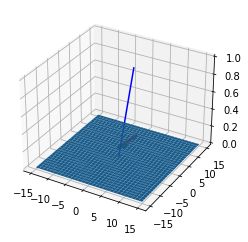

In [2]:
# set S
S1 = np.array([1, 1, 0])
S2 = np.array([1, 7, 0])

# vectors v and w
v = np.array([1, 2, 0])
w = np.array([3, 2, 1])

# draw vectors
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot([0, S1[0]],[0, S1[1]],[.1, S1[2]+.1],'r',linewidth=3)
ax.plot([0, S2[0]],[0, S2[1]],[.1, S2[2]+.1],'r',linewidth=3)

ax.plot([0, v[0]],[0, v[1]],[.1, v[2]+.1],'g',linewidth=3)
ax.plot([0, w[0]],[0, w[1]],[0, w[2]],'b')

# now draw plane
xx, yy = np.meshgrid(range(-15,16), range(-15,16))
cp = np.cross(S1,S2)
z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,z1)

plt.show()